<a href="https://colab.research.google.com/github/satvik-creatifying/Handwritten-Digit-Classification/blob/main/Handwritten_Digits_Classifications.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
#import keras

In [ ]:
(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
len(X_train)

60000

In [ ]:
X_train[0].shape

(28, 28)

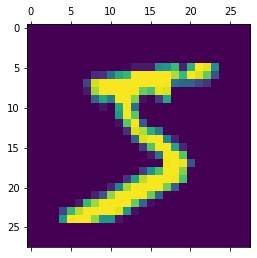

In [ ]:
plt.matshow(X_train[0])

In [ ]:
#scaling
X_train = X_train / 255
X_test = X_test / 255
#Now will flatten the data set in order to put them in the NN
X_trainf=X_train.reshape(len(X_train), 28*28)

In [ ]:
X_testf=X_test.reshape(len(X_test), 28*28)

Now we will create a NN






In [ ]:
model= keras.Sequential([
    keras.layers.Dense(10,input_shape=(784,), activation='sigmoid')            
      
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy']
              )

model.fit(X_trainf,y_train, epochs=10)


Epoch 1/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4707 - accuracy: 0.8776
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3044 - accuracy: 0.9152
Epoch 3/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2832 - accuracy: 0.9221
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2735 - accuracy: 0.9232
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2666 - accuracy: 0.9255
Epoch 6/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2622 - accuracy: 0.9269
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2579 - accuracy: 0.9286
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2557 - accuracy: 0.9294
Epoch 9/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2530 - accuracy: 0.9300
Epoch 10/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.251

In [ ]:
model.evaluate(X_testf,y_test)

313/313 [==============================] - 1s 1ms/step - loss: 0.2646 - accuracy: 0.9280


[0.26464512944221497, 0.9279999732971191]

In [ ]:
y_pred=model.predict(X_testf)
y_pred[0]

array([3.44976783e-03, 1.23450512e-08, 2.25019455e-02, 9.71521437e-01,
       1.77994370e-03, 1.22547984e-01, 2.58622883e-08, 9.99816656e-01,
       7.63000548e-02, 6.22874081e-01], dtype=float32)

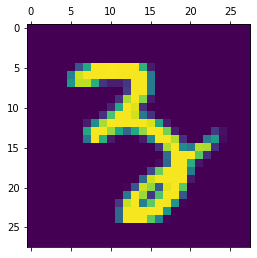

In [ ]:
plt.matshow(X_test[87])

In [ ]:
y_pred=model.predict(X_testf)
y_pred[87]

array([2.9229224e-03, 1.3443590e-06, 5.3393841e-04, 9.8277557e-01,
       5.8185548e-02, 8.9760578e-01, 5.9729517e-03, 1.4085078e-01,
       3.0550897e-02, 1.5828311e-03], dtype=float32)

In [ ]:
np.argmax(y_pred[87])

3

In [ ]:
y_predicted_labels = [np.argmax(i) for i in y_pred]

In [ ]:

y_predicted_labels[:5]

[7, 2, 1, 0, 4]

In [ ]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 962,    0,    1,    2,    0,    5,    7,    2,    1,    0],
       [   0, 1109,    4,    2,    0,    1,    4,    2,   13,    0],
       [   5,    8,  931,   16,    8,    3,   13,   10,   36,    2],
       [   2,    0,   19,  931,    1,   16,    3,    9,   23,    6],
       [   1,    1,    6,    2,  926,    0,    8,    5,    9,   24],
       [   8,    2,    3,   44,   12,  759,   16,    9,   33,    6],
       [   9,    3,    8,    2,    7,    7,  917,    2,    3,    0],
       [   1,    6,   23,    5,    7,    1,    0,  959,    2,   24],
       [   6,    6,    6,   23,    9,   17,    9,   12,  880,    6],
       [  11,    7,    1,   11,   34,    5,    0,   28,    6,  906]],
      dtype=int32)>

Text(69.0, 0.5, 'Truth')

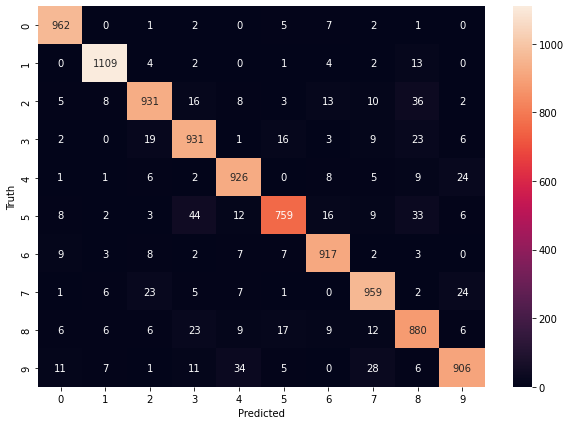

In [ ]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

Now we add an hidden layer

In [ ]:
model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,), activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_trainf, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2765 - accuracy: 0.9209
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1265 - accuracy: 0.9632
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0872 - accuracy: 0.9742
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0663 - accuracy: 0.9797
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0520 - accuracy: 0.9842


In [ ]:
model.evaluate(X_testf,y_test)

313/313 [==============================] - 1s 1ms/step - loss: 0.0805 - accuracy: 0.9752


[0.08051738142967224, 0.9751999974250793]

Text(69.0, 0.5, 'Truth')

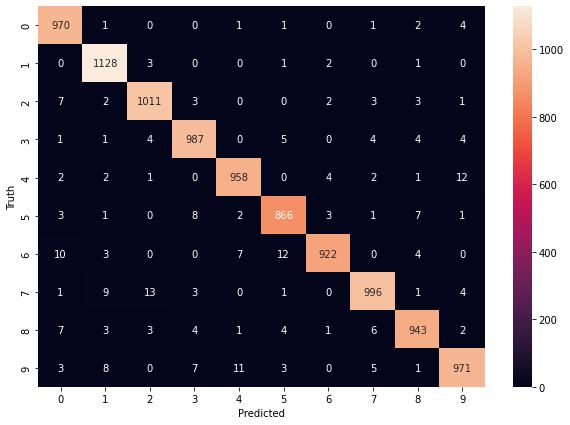

In [ ]:
y_predicted = model.predict(X_testf)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

Using Flatten layer so that we don't have to call .reshape on input dataset

In [ ]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(100, input_shape=(784,), activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2730 - accuracy: 0.9234
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1230 - accuracy: 0.9637
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0846 - accuracy: 0.9752
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0649 - accuracy: 0.9805
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0509 - accuracy: 0.9844


In [ ]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0746 - accuracy: 0.9758


[0.0745932087302208, 0.9757999777793884]

Text(69.0, 0.5, 'Truth')

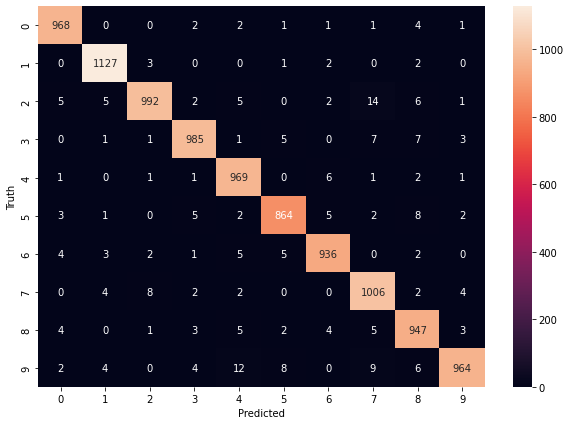

In [ ]:
y_predicted = model.predict(X_test)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')